<a href="https://colab.research.google.com/github/JPVillamizarCastillo/Bank-transaction-analysis/blob/main/Titanic_disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerias que vamos a necesitar
import pandas as pd
import sqlalchemy as alch

#Hacemos la conexion a Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_gender=pd.read_csv("/content/drive/MyDrive/COLAB NOTEBOOKS/TITANIC/gender_submission.csv")
df_test=pd.read_csv("/content/drive/MyDrive/COLAB NOTEBOOKS/TITANIC/test.csv")
df_train=pd.read_csv("/content/drive/MyDrive/COLAB NOTEBOOKS/TITANIC/train.csv")

# Analisis descriptivo

In [ ]:
df_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Gender no cuenta con valores nulos

In [ ]:
df_gender.isnull().sum()

,0
PassengerId,0
Survived,0


Test cuenta con valores nulos en las variables: Age, Fare and Cabin.
Debemos entrar para revisar a detalle estos valores y comprobar si efctivamente son nulos.


In [ ]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


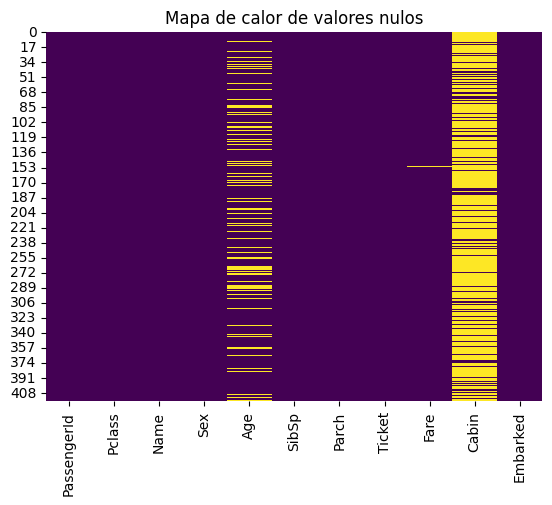

In [ ]:
#Importamos las librerias necesarias para visualizar
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para visualizar los valores nulos
sns.heatmap(df_test.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

***Análisis de causas:*** Es importante comprender las razones por las cuales existen valores nulos en tu dataset. Esto te ayudará a tomar decisiones más informadas sobre cómo tratarlos.

In [ ]:
filas_con_nulos = df_test[df_test["Age"].isnull()]
print(filas_con_nulos)

     PassengerId  Pclass                                               Name  \
10           902       3                                   Ilieff, Mr. Ylio   
22           914       1               Flegenheim, Mrs. Alfred (Antoinette)   
29           921       3                                  Samaan, Mr. Elias   
33           925       3  Johnston, Mrs. Andrew G (Elizabeth Lily" Watson)"   
36           928       3                                Roth, Miss. Sarah A   
..           ...     ...                                                ...   
408         1300       3                    Riordan, Miss. Johanna Hannah""   
410         1302       3                             Naughton, Miss. Hannah   
413         1305       3                                 Spector, Mr. Woolf   
416         1308       3                                Ware, Mr. Frederick   
417         1309       3                           Peter, Master. Michael J   

        Sex  Age  SibSp  Parch      Ticket     Fare

# **Preguntas clave para analizar**

*   ¿Por qué faltan los datos de edad en ciertos pasajeros? ¿Es porque no se registraron o porque no eran relevantes para esos pasajeros?
*   ¿Hay alguna relación entre la falta de datos de cabina y la clase de pasajero?
*   ¿Los pasajeros que embarcaron en diferentes puertos tienen una mayor proporción de valores nulos en alguna variable en particular?




